# Modelo de lanzamiento de moneda

## Selección de herramientas

In [1]:
from numpy import vander, zeros, linspace, cumsum, arange, diff
from numpy.random import seed, choice
from scipy.linalg import pinv, hankel, svd
from pandas import DataFrame, read_excel
from matplotlib.pyplot import subplot, plot, xlim, title, xlabel, ylabel, axis, legend, show, gca, hist, spy 
from scipy.stats import norm
from networkx import draw_networkx, circular_layout

/home/fredy/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Lectura de datos

In [2]:
# Se leen los datos
tosses_data = read_excel('Lanzamientos.xlsx',sheet_name='Lanzamientos')

tosses = tosses_data.values[:,0]

# Se identifica la cantidad de datos de entrada
N_tosses = len(tosses)

# Se calcula la cuenta acumulada de caras N_c(n) y la correspondiente proporción p_c(n)
Nc = cumsum(tosses)              # Suma acumulada de caras
n_values = arange(1, N_tosses+1)         # Número de lanzamientos de 1 a N_tosses
pc = Nc / n_values                   # Proporción de caras

# Crear DataFrame para mostrar resultados
results_df = DataFrame({
    'Numero de Lanzamiento (n)': n_values,
    'Conteo de caras (N_c(n))': Nc,
    'Proporcion de Caras (p_c(n))': pc
})

tosses_data

Resultado
0            0
1            1
2            1
3            0
4            1
..         ...
495          0
496          1
497          0
498          1
499          0

[500 rows x 1 columns]

In [3]:
# Mostrar el DataFrame
results_df

Numero de Lanzamiento (n)  Conteo de caras (N_c(n))  \
0                            1                         0   
1                            2                         1   
2                            3                         2   
3                            4                         2   
4                            5                         3   
..                         ...                       ...   
495                        496                       260   
496                        497                       261   
497                        498                       261   
498                        499                       262   
499                        500                       262   

     Proporcion de Caras (p_c(n))  
0                        0.000000  
1                        0.500000  
2                        0.666667  
3                        0.500000  
4                        0.600000  
..                            ...  
495                      0.524194  
496                      0.525151  
497                      0.524096  
498                      0.525050  
499                      0.524000  

[500 rows x 3 columns]

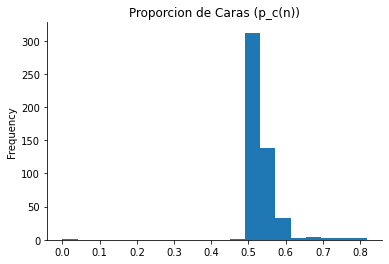

In [4]:
results_df['Proporcion de Caras (p_c(n))'].plot(kind='hist', bins=20, title='Proporcion de Caras (p_c(n))')
gca().spines[['top', 'right',]].set_visible(False)

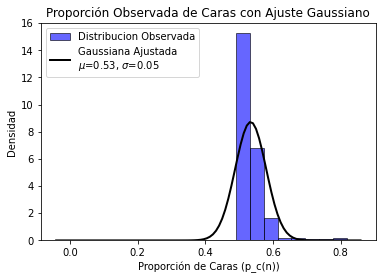

In [5]:
# Se grafica la distribución observada de p_c(n)
hist(pc, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black', label='Distribucion Observada')

# Se ajusta una Gaussiana a las proporciones observedas y se grafica
mu, std = norm.fit(pc)
xmin, xmax = xlim()
x = linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plot(x, p, 'k', linewidth=2, label=f'Gaussiana Ajustada\n$\mu$={mu:.2f}, $\sigma$={std:.2f}')

# Customize plot
title("Proporción Observada de Caras con Ajuste Gaussiano")
xlabel("Proporción de Caras (p_c(n))")
ylabel("Densidad")
legend()
show()

([<matplotlib.lines.Line2D at 0x71f2084f8280>],
 [<matplotlib.lines.Line2D at 0x71f2084f8520>])

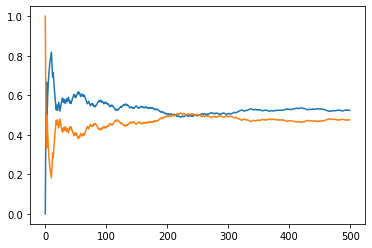

In [6]:
from matplotlib.pyplot import plot
plot(pc),plot(1-pc)

In [7]:
r = zeros((2,len(pc)))

In [8]:
r[0,:] = pc
r[1,:] = 1-pc
N_en = 300
A = r[:,1:(N_en+1)]@pinv(r[:,:N_en])

([<matplotlib.lines.Line2D at 0x71f2086760b0>,
 [<matplotlib.lines.Line2D at 0x71f2086604c0>])

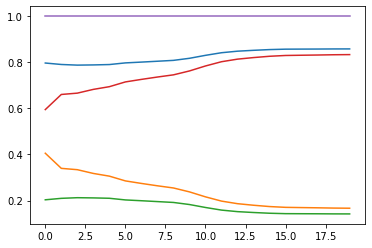

In [9]:
Nt = 20
A0_evolution = zeros((4,Nt))
for N_ent in range(Nt):
  A0 = r[:,1:((N_ent+1)*20+1)]@pinv(r[:,:(N_ent+1)*20])
  A0_evolution[:,N_ent] = A0.reshape(4)
plot(A0_evolution.T),plot(sum(A0_evolution)/2)

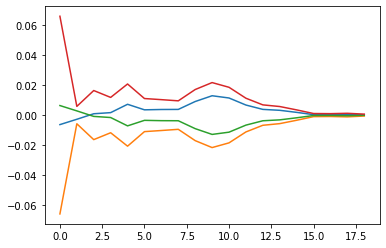

In [10]:
plot((A0_evolution[:,1:]-A0_evolution[:,:-1]).T)

([<matplotlib.lines.Line2D at 0x71f1ec7d61d0>,
  <matplotlib.lines.Line2D at 0x71f1ec7d6830>])

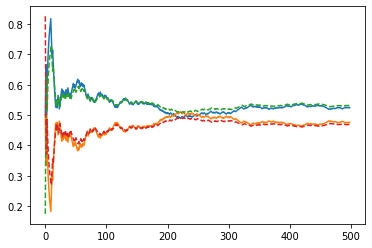

In [11]:
plot(r[:,1:].T),plot(r[:,:-1].T@A.T,'--')

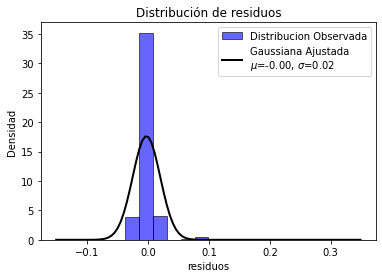

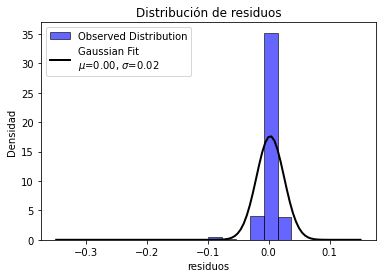

In [12]:
res_0 = r[:,1:]-A@r[:,:-1]
# Graficar distribucion observada de p_c(n)
hist(res_0[0,:], bins=20, density=True, alpha=0.6, color='blue', edgecolor='black', label='Distribucion Observada')

# Ajustar una Gaussiana a las proporciones observadas y graficar
mu, std = norm.fit(res_0[0,:])
xmin, xmax = xlim()
x = linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plot(x, p, 'k', linewidth=2, label=f'Gaussiana Ajustada\n$\mu$={mu:.2f}, $\sigma$={std:.2f}')

# Customize plot
title("Distribución de residuos")
xlabel("residuos")
ylabel("Densidad")
legend()
show()

hist(res_0[1,:], bins=20, density=True, alpha=0.6, color='blue', edgecolor='black', label='Observed Distribution')

# Fit a Gaussian to the observed proportions and plot
mu, std = norm.fit(res_0[1,:])
xmin, xmax = xlim()
x = linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plot(x, p, 'k', linewidth=2, label=f'Gaussian Fit\n$\mu$={mu:.2f}, $\sigma$={std:.2f}')

# Customize plot
title("Distribución de residuos")
xlabel("residuos")
ylabel("Densidad")
legend()
show()

In [13]:
A0 = A
for k in range(N_tosses-1):
  A0 = A@A0
A0

array([[0.54555899, 0.54555899],
       [0.45444101, 0.45444101]])

([<matplotlib.lines.Line2D at 0x71f1ec5b1ff0>,
  <matplotlib.lines.Line2D at 0x71f1ec5b2650>])

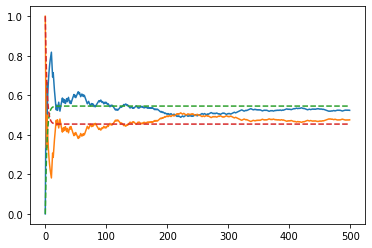

In [14]:
r0 = zeros(r.shape)
r0[:,0] = r[:,0]
for j in range(N_tosses-1):
  r0[:,j+1] = A@r0[:,j]
plot(r.T),plot(r0.T,'--')

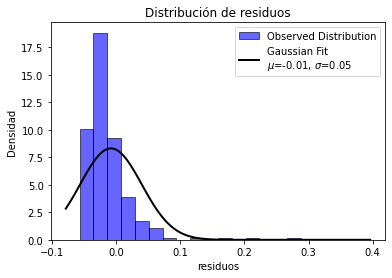

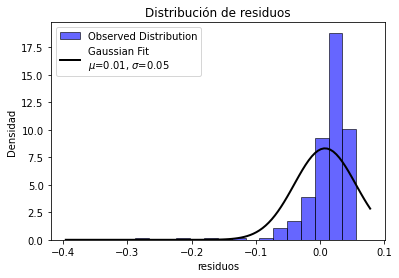

In [15]:
res_1 = r-r0
# Plot observed distribution of p_c(n)
hist(res_1[0,:], bins=20, density=True, alpha=0.6, color='blue', edgecolor='black', label='Observed Distribution')

# Fit a Gaussian to the observed proportions and plot
mu, std = norm.fit(res_1[0,:])
xmin, xmax = xlim()
x = linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plot(x, p, 'k', linewidth=2, label=f'Gaussian Fit\n$\mu$={mu:.2f}, $\sigma$={std:.2f}')

# Customize plot
title("Distribución de residuos")
xlabel("residuos")
ylabel("Densidad")
legend()
show()

hist(res_1[1,:], bins=20, density=True, alpha=0.6, color='blue', edgecolor='black', label='Observed Distribution')

# Fit a Gaussian to the observed proportions and plot
mu, std = norm.fit(res_1[1,:])
xmin, xmax = xlim()
x = linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plot(x, p, 'k', linewidth=2, label=f'Gaussian Fit\n$\mu$={mu:.2f}, $\sigma$={std:.2f}')

# Customize plot
title("Distribución de residuos")
xlabel("residuos")
ylabel("Densidad")
legend()
show()

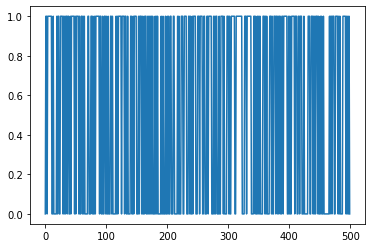

In [16]:
plot(tosses)

In [17]:
def Phi(y,ws,deg):
    m = int((ws-1)/2)
    x_m = linspace(-m,m,ws)/ws
    J = vander(x_m,deg+1)
    Pw = svd(J,full_matrices=0)[0]
    Pw = Pw@Pw.T
    ls = len(y)
    s_f = zeros(ls)
    for j in range(m):
        s_f[j] = Pw[j,:]@y[:ws]
        s_f[-(j+1)] = Pw[-(j+1),:]@y[-ws:]
    for k in range(ls-ws+1):
        s_f[k+m]=Pw[m,:]@y[(k):(k+ws)]
    return s_f

([<matplotlib.lines.Line2D at 0x71f1ec4ba500>,
  <matplotlib.lines.Line2D at 0x71f1ec480f70>])

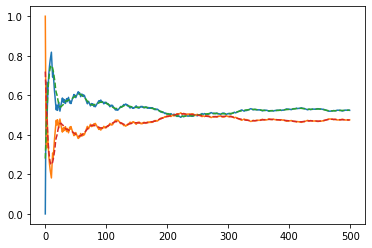

In [18]:
rf = zeros(r.shape)
rf[0,:] = Phi(r[0,:],ws=33,deg = 3)
rf[1,:] = Phi(r[1,:],ws=33,deg = 3)
plot(r.T),plot(rf.T,'--')

In [19]:
Af = rf[:,1:(N_en+1)]@pinv(rf[:,:N_en])

In [20]:
Af

array([[0.96955658, 0.03753095],
       [0.03044342, 0.96246905]])

([<matplotlib.lines.Line2D at 0x71f1ec407bb0>,
  <matplotlib.lines.Line2D at 0x71f1ec5ecd30>])

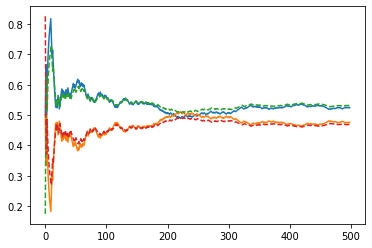

In [21]:
plot(r[:,1:].T),plot(r[:,:-1].T@A.T,'--')

([<matplotlib.lines.Line2D at 0x71f1ec5479d0>,
  <matplotlib.lines.Line2D at 0x71f1ec546920>])

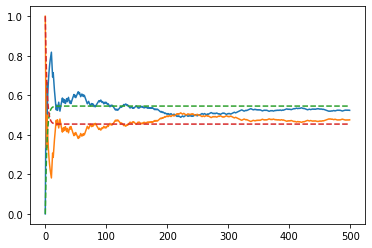

In [22]:
r0 = zeros(r.shape)
r0[:,0] = r[:,0]
for j in range(N_tosses-1):
  r0[:,j+1] = A@r0[:,j]
plot(r.T),plot(r0.T,'--')

In [25]:
A_2 = zeros((4,4))
A_2[0,0] = 0.95
A_2[1,0] = 0.05
A_2[0,1] = 0.04
A_2[1,1] = 0.85
A_2[2,1] = 0.1
A_2[3,1] = 0.01
A_2[2,2] = 1
A_2[3,3] = 1
print(sum(A_2))
print(A_2)

[1. 1. 1. 1.]
[[0.95 0.04 0.   0.  ]
 [0.05 0.85 0.   0.  ]
 [0.   0.1  1.   0.  ]
 [0.   0.01 0.   1.  ]]


### Referencias

1. F. Vides, G. Lopez. Structured Reservoir Computing Circuits for System Identification. In preparation.
2. Boyd, S., Vandenberghe, L. Introduction to Applied Linear Algebra: Vectors, Matrices, and Least Squares. Cambridge University Press, 2018.
3. Vides, F. M´etodos Num´ericos y Modelaci´on Computacional. Disponible
en: https://fredyvides.github.io/MNMC.pdf, 2019.